In [61]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [71]:
data = pd.read_csv('churn_analysis.csv')

In [72]:
states = np.unique(data.state.values)

In [73]:
data_t = data[data.treatment==1]

In [74]:
answ_1 = 0
for i in combinations(states, 2):
    d = data_t.loc[data_t['state'].isin(i)]
    subtab = pd.crosstab(d.state, d.churn)
    p = stats.chi2_contingency(subtab.values, correction=False)[1]
    if p<0.05:
        answ_1 += 1
print(answ_1)

34


In [ ]:
pd.pivot_table()

In [67]:
churn = data

In [68]:
pt_states = pd.pivot_table(churn.loc[churn.treatment == 1], values='treatment', index='state', columns='churn',
                               aggfunc=len, fill_value=0)

In [69]:
chi2_val = pd.DataFrame(columns=['state 1', 'state 2', 'chi2_stat', 'p-value'])
i = 0
for st1, st2 in combinations(pt_states.index, 2):
    chi2_table = pt_states.loc[[st1, st2],:]
    chi2_val.loc[i, 'state 1'] = st1
    chi2_val.loc[i, 'state 2'] = st2
    chi2_stat = stats.chi2_contingency(chi2_table.values, correction=False)
    chi2_val.loc[i, 'chi2_stat'] = chi2_stat[0]
    chi2_val.loc[i, 'p-value'] = chi2_stat[1]
    i += 1

In [70]:

sign_lvls_num = len(chi2_val.loc[chi2_val['p-value'] <= 0.05, :])
print('Num of significance lvls below 0.05: %d' % sign_lvls_num)

Num of significance lvls below 0.05: 34


In [53]:
answ_3 = 0
for i in combinations(states, 2):
    d = data.loc[data['state'].isin(i)]
    subtab = pd.crosstab(d.state, d.churn)
    p = stats.chi2_contingency(subtab, correction=True)[1]
    if p<0.05:
        answ_3 += 1
print(answ_3)

101


In [54]:
answ_4 = 0
for i in combinations(states, 2):
    d = data.loc[data['state'].isin(i)]
    subtab = pd.crosstab(d.state, d.churn)
    p = stats.fisher_exact(subtab)[1]
    if p<0.05:
        answ_4 += 1
print(answ_4)

130


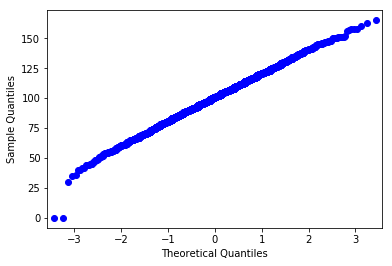

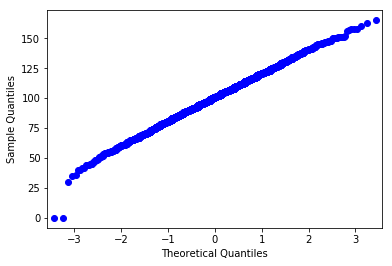

In [63]:
qqplot(data.day_calls)

In [55]:
stats.pearsonr(data.day_calls, data.mes_estim)

(-0.051794350587572625, 0.0027798836869756707)

In [58]:
stats.spearmanr(data.day_calls, data.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

In [48]:
data.loc[data['state'].isin(['AL','AK'])];

In [20]:
for i in combinations(states, 2):
    print(i)

('AK', 'AL')
('AK', 'AR')
('AK', 'AZ')
('AK', 'CA')
('AK', 'CO')
('AK', 'CT')
('AK', 'DC')
('AK', 'DE')
('AK', 'FL')
('AK', 'GA')
('AK', 'HI')
('AK', 'IA')
('AK', 'ID')
('AK', 'IL')
('AK', 'IN')
('AK', 'KS')
('AK', 'KY')
('AK', 'LA')
('AK', 'MA')
('AK', 'MD')
('AK', 'ME')
('AK', 'MI')
('AK', 'MN')
('AK', 'MO')
('AK', 'MS')
('AK', 'MT')
('AK', 'NC')
('AK', 'ND')
('AK', 'NE')
('AK', 'NH')
('AK', 'NJ')
('AK', 'NM')
('AK', 'NV')
('AK', 'NY')
('AK', 'OH')
('AK', 'OK')
('AK', 'OR')
('AK', 'PA')
('AK', 'RI')
('AK', 'SC')
('AK', 'SD')
('AK', 'TN')
('AK', 'TX')
('AK', 'UT')
('AK', 'VA')
('AK', 'VT')
('AK', 'WA')
('AK', 'WI')
('AK', 'WV')
('AK', 'WY')
('AL', 'AR')
('AL', 'AZ')
('AL', 'CA')
('AL', 'CO')
('AL', 'CT')
('AL', 'DC')
('AL', 'DE')
('AL', 'FL')
('AL', 'GA')
('AL', 'HI')
('AL', 'IA')
('AL', 'ID')
('AL', 'IL')
('AL', 'IN')
('AL', 'KS')
('AL', 'KY')
('AL', 'LA')
('AL', 'MA')
('AL', 'MD')
('AL', 'ME')
('AL', 'MI')
('AL', 'MN')
('AL', 'MO')
('AL', 'MS')
('AL', 'MT')
('AL', 'NC')
('AL', 'ND')

In [64]:
def cramers_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [ ]:
cramers_stat

In [65]:
data.treatment

0       1
1       0
2       0
3       1
4       2
5       2
6       0
7       0
8       1
9       2
10      2
11      0
12      1
13      0
14      2
15      2
16      0
17      1
18      0
19      0
20      0
21      1
22      2
23      2
24      2
25      0
26      1
27      2
28      1
29      0
       ..
3303    1
3304    0
3305    1
3306    0
3307    0
3308    1
3309    1
3310    0
3311    0
3312    0
3313    1
3314    2
3315    1
3316    0
3317    1
3318    0
3319    1
3320    0
3321    0
3322    1
3323    1
3324    0
3325    1
3326    0
3327    0
3328    2
3329    2
3330    1
3331    2
3332    0
Name: treatment, Length: 3333, dtype: int64